In [1]:
from fastai.vision.all import *

from training import get_document_tiles, GetLabelFromX, SyntheticImageBlock

In [4]:
from fastai.torch_core import TensorCategory

Checking SVG files in ../data/signatures/ok_signatures/


100%|██████████| 50/50 [02:06<00:00,  2.53s/it]


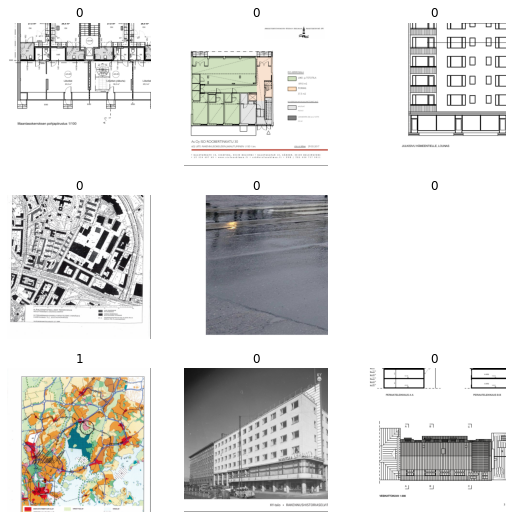

In [2]:
db = DataBlock(blocks=[SyntheticImageBlock(svg_directory='../data/signatures/ok_signatures/', positive_prob=0.3), CategoryBlock],
               get_items=get_document_tiles,
               get_x=ItemGetter(0),
               get_y=ItemGetter(1),
               item_tfms=[GetLabelFromX()])

dls = db.dataloaders('../data/documents/ok_documents/', bs=80)

dls.show_batch()

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=1.5848931980144698e-06)

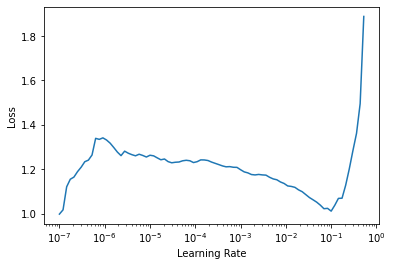

In [3]:
learner = cnn_learner(dls, resnet18, metrics=[error_rate, Recall(), Precision(), F1Score()])
learner.lr_find()

In [ ]:
cbs = [ShowGraphCallback(), SaveModelCallback(fname='resnet18_based_model')]
learner.fine_tune(30, freeze_epochs=3, base_lr=2e-2, cbs=cbs)